#### Data Understanding

Import libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the dataset.

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

Display the first few rows of the dataset.

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Summarize the dataset.

In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Get a summary of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Check for missing values.

In [6]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Check the distribution of the target variable.

In [7]:
df["churn"].value_counts(normalize=True)

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Exploratory Data Analysis (EDA)

Check the distribution of numerical features.

c:\Users\User\anaconda3\envs\churn_prediction\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


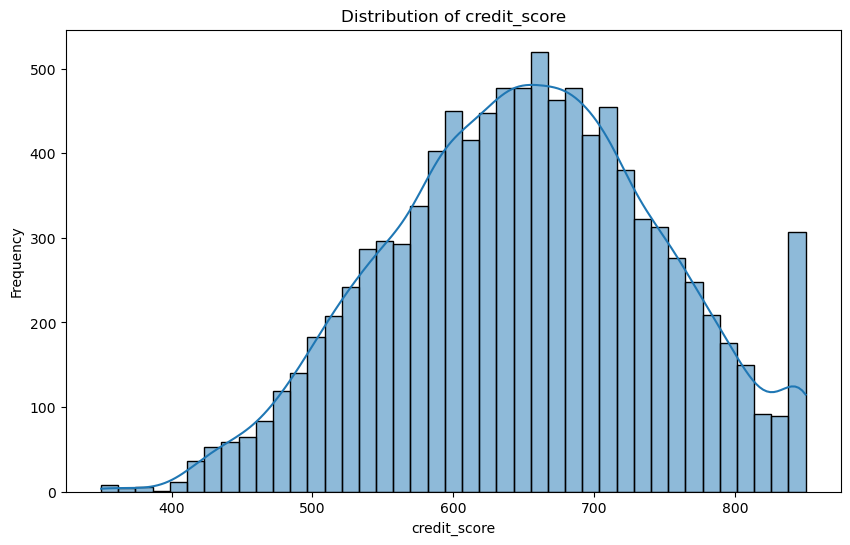

c:\Users\User\anaconda3\envs\churn_prediction\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


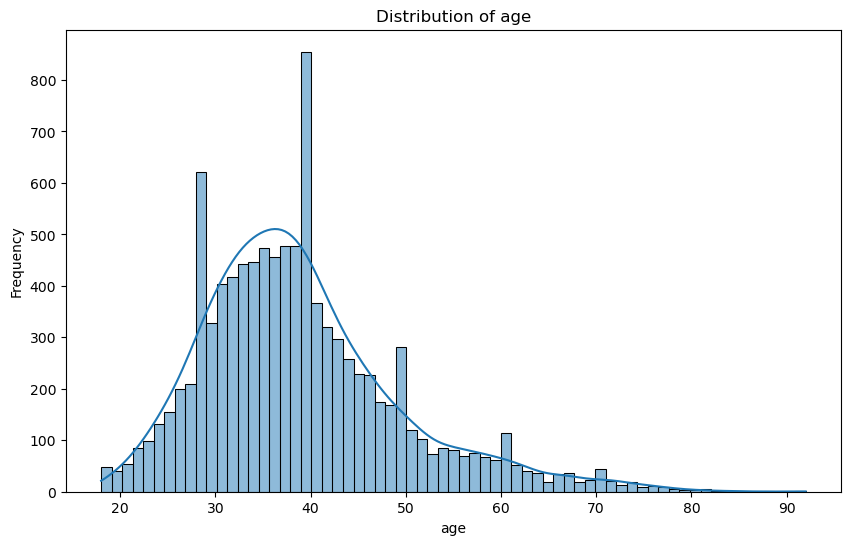

c:\Users\User\anaconda3\envs\churn_prediction\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


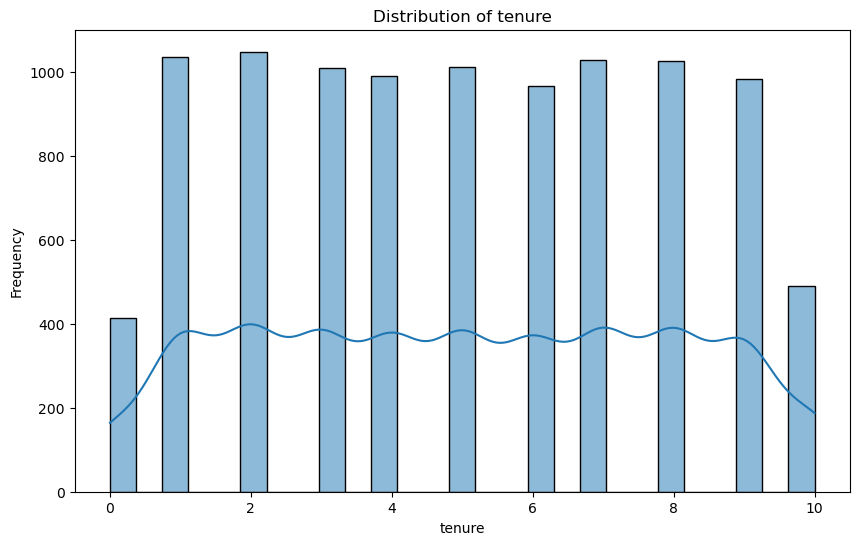

c:\Users\User\anaconda3\envs\churn_prediction\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


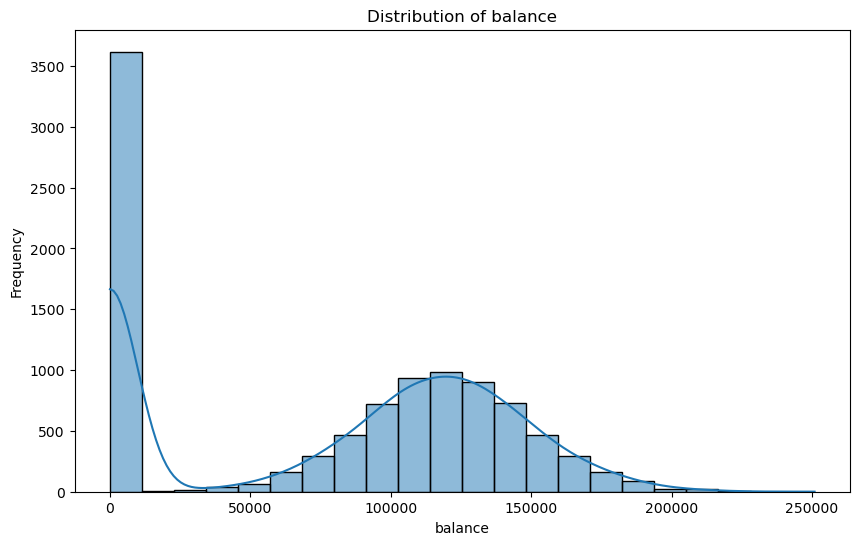

c:\Users\User\anaconda3\envs\churn_prediction\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


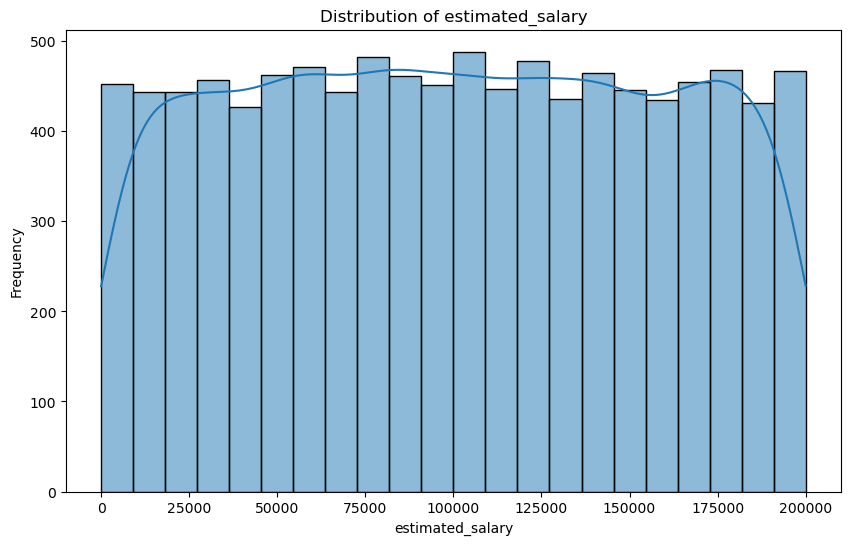

In [8]:
# Distribution of numerical features
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Check the relationship between categorical features and target variable.

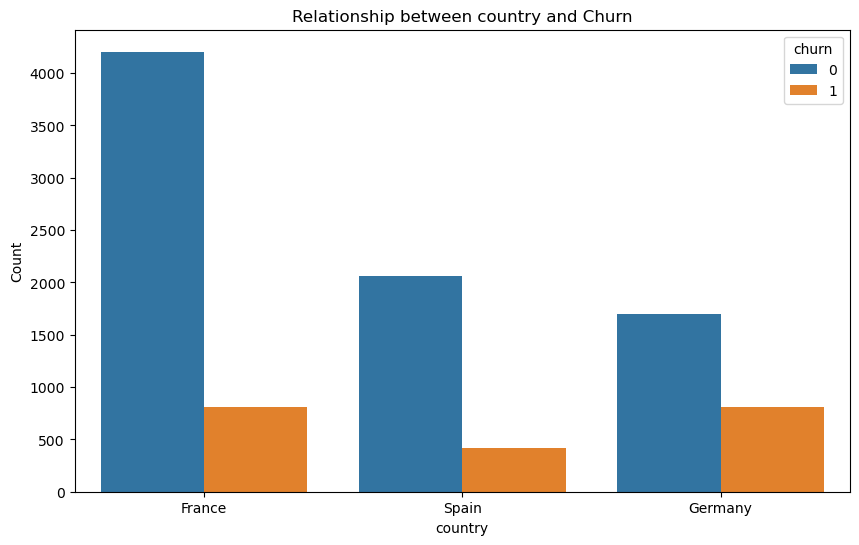

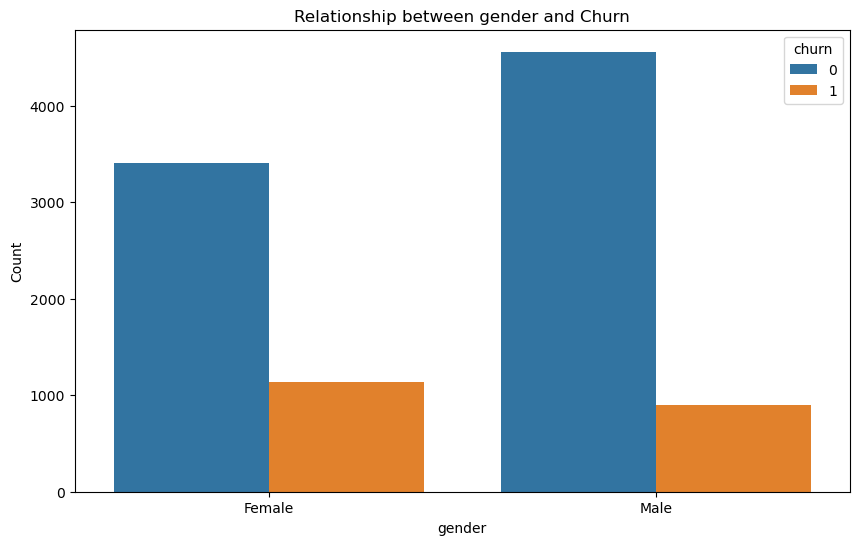

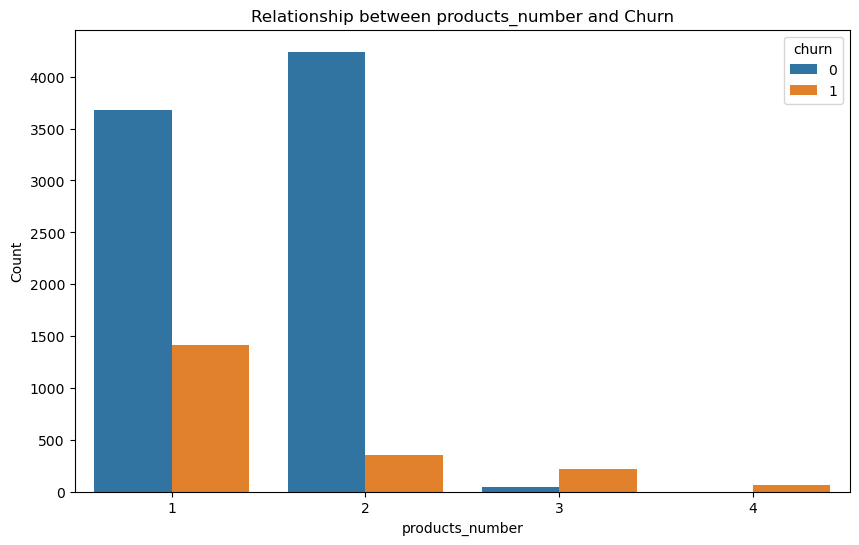

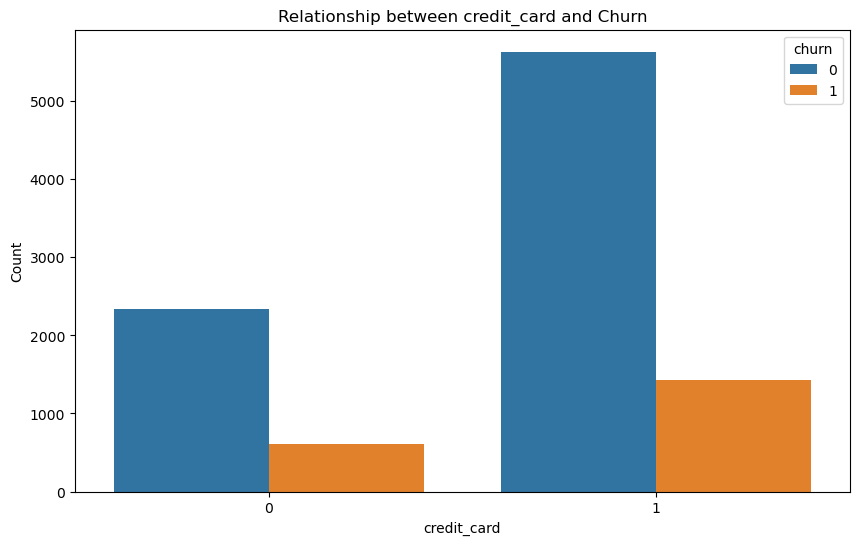

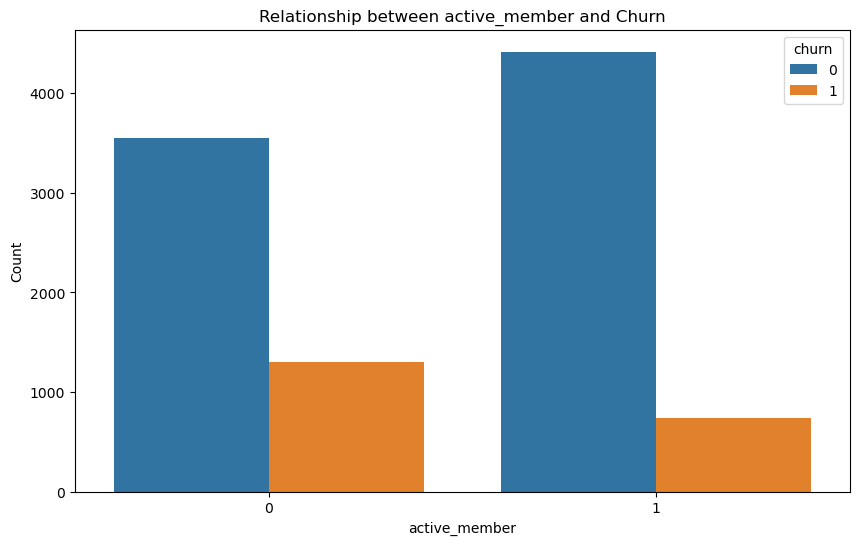

In [9]:
categorical_features = ['country', 'gender', 'products_number', 'credit_card', 'active_member']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='churn', data=df)
    plt.title(f'Relationship between {feature} and Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

Outlier Detection

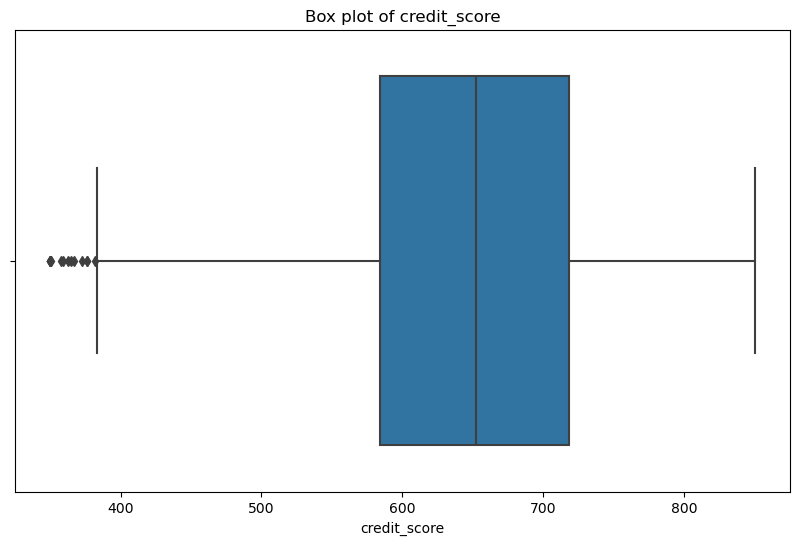

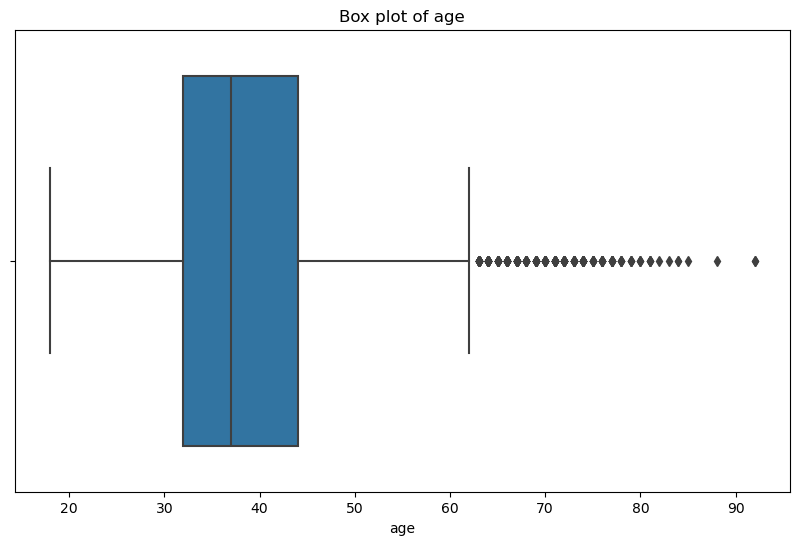

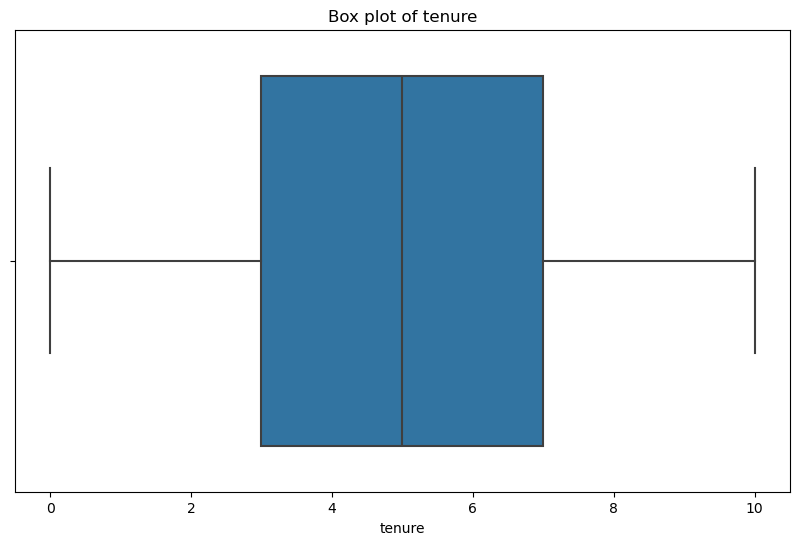

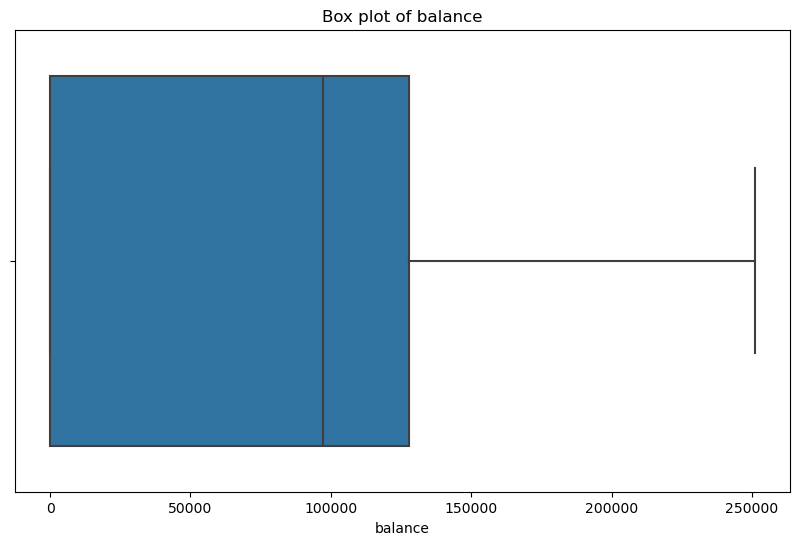

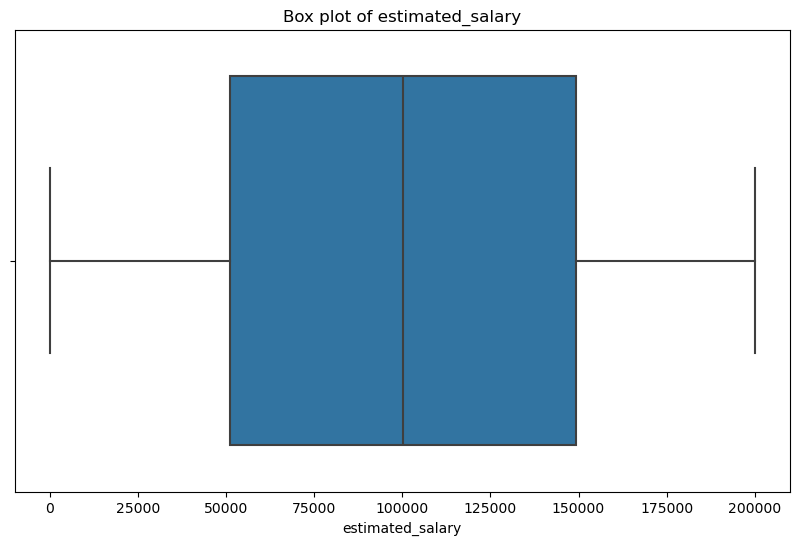

In [10]:
# Box plots to identify outliers in numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.xlabel(feature)
    plt.show()

Check the distribution of the target variable.

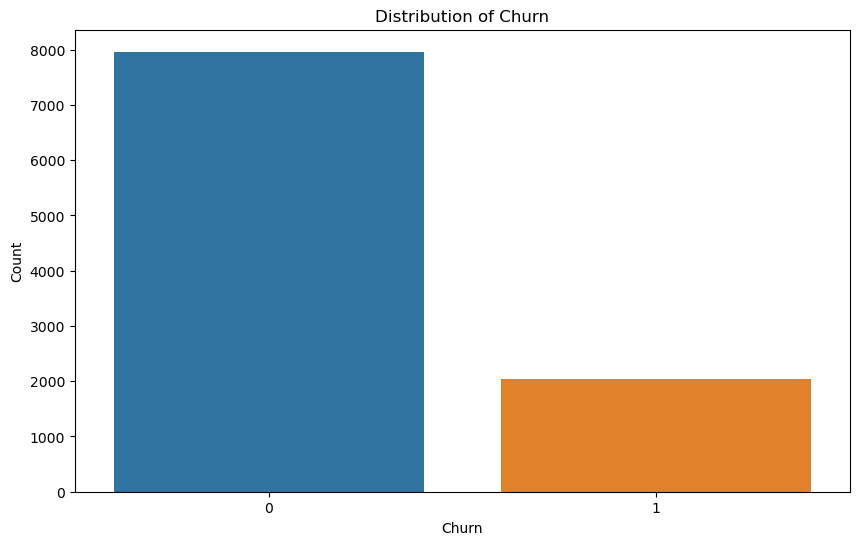

In [11]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=df['churn'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Check for duplicated values.

In [12]:
df.duplicated().sum()

0

#### Data Preparation

Drop unused column.

In [13]:
# Drop the 'customer_id' column
df = df.drop(columns=['customer_id'])

Handle outliers in 'credit_score'.

In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Remove outliers
df = df[(df['credit_score'] >= lower_bound) & (df['credit_score'] <= upper_bound)]

# Verify the shape of the dataset after removing outliers
print(f'Dataset shape after removing outliers: {df.shape}')

Lower bound: 383.0
Upper bound: 919.0
Dataset shape after removing outliers: (9985, 11)


Encode categorical variables.

In [15]:
# Encode the categorical features
df['country'] = df['country'].map({'France': 0, 'Spain' : 1,'Germany':2})
df['gender'] = df['gender'].map({'Male': 0, 'Female' : 1})

Define the features and target variable.

In [16]:
# Define features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

Standard scaling for numerical features.

In [18]:
from sklearn.preprocessing import StandardScaler

# Standard scaling for numerical features
scaler = StandardScaler()
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 
                      'credit_card', 'active_member', 'estimated_salary']

# Scale the numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])

Split the data into training and testing sets.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Balance the training data.

In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verify the shape of the balanced training set
print(f'Balanced training set shape: {X_train_balanced.shape}')
print("Balanced training target distribution:\n", pd.Series(y_train_balanced).value_counts())

Balanced training set shape: (12810, 10)
Balanced training target distribution:
 churn
0    6405
1    6405
Name: count, dtype: int64


In [21]:
X_train_balanced

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,0.656172,0,0,2.296646,-0.350777,0.987479,-0.912746,-1.546867,0.969518,1.158700
1,0.229388,0,0,0.770941,-1.388353,-1.225663,0.808782,-1.546867,-1.031440,0.151765
2,0.385529,1,0,-0.182624,0.686798,0.988765,0.808782,0.646468,0.969518,0.241550
3,-0.259851,2,0,0.961654,1.378515,1.527704,0.808782,0.646468,-1.031440,1.515375
4,1.166230,2,1,2.105933,-1.388353,-0.166200,-0.912746,0.646468,0.969518,0.764095
...,...,...,...,...,...,...,...,...,...,...
12805,-0.689293,0,1,2.121149,1.214784,-1.225663,-0.912746,-1.546867,0.969518,-0.659609
12806,0.198588,1,0,0.438758,-0.109811,-0.762538,-0.912746,0.646468,-1.031440,0.271592
12807,0.498946,2,0,1.203677,1.063006,0.543626,2.530310,0.646468,0.969518,-0.318013
12808,0.543824,0,0,0.478539,-1.711244,1.677671,-0.912746,0.646468,-1.031440,-0.493292


#### Modeling

Import libraries.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, auc

Training models with hyperparameter tuning.

Random Forest

In [23]:
# Random Forest
# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Random Forest with GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')


# Fit Random Search and find the best model
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Get the best model
best_rf = grid_search_rf.best_estimator_

# Predict using the best model
y_pred_rf = best_rf.predict(X_test)

# Evaluate Random Forest
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_rf)}")

Random Forest
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1558
           1       0.61      0.54      0.58       439

    accuracy                           0.82      1997
   macro avg       0.74      0.72      0.73      1997
weighted avg       0.82      0.82      0.82      1997

ROC-AUC: 0.7229319757530389


XGBoost

In [24]:
# XGBoost
# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# XGBoost with RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), 
                                       param_distributions=param_grid_xgb, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)

# Fit Random Search and find the best model
random_search_xgb.fit(X_train_balanced, y_train_balanced)

# Get the best model
best_xgb = random_search_xgb.best_estimator_

# Predict using the best model
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate XGBoost
print("XGBoost")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_xgb)}")

XGBoost
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1558
           1       0.68      0.53      0.60       439

    accuracy                           0.84      1997
   macro avg       0.78      0.73      0.75      1997
weighted avg       0.83      0.84      0.84      1997

ROC-AUC: 0.7312131375719704


Naive Bayes

In [25]:
# Naive Bayes
# Define hyperparameter grid
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Naive Bayes with GridSearchCV
grid_search_nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit Grid Search and find the best model
grid_search_nb.fit(X_train_balanced, y_train_balanced)

# Get the best model
best_nb = grid_search_nb.best_estimator_

# Predict using the best model
y_pred_nb = best_nb.predict(X_test)

# Evaluate Naive Bayes
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_nb)}")

Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1558
           1       0.43      0.70      0.53       439

    accuracy                           0.73      1997
   macro avg       0.66      0.72      0.67      1997
weighted avg       0.80      0.73      0.75      1997

ROC-AUC: 0.7205020161938821


K-Nearest Neighbors (KNN)

In [26]:
# K-Nearest Neighbors
# Define hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize Random Search
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc')

# Fit Grid Search and find the best model
random_search_knn.fit(X_train_balanced, y_train_balanced)

# Get the best model
best_knn = random_search_knn.best_estimator_

# Predict using the best model
y_pred_knn = best_knn.predict(X_test)

# Evaluate K-Nearest Neighbors
print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_knn)}")

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1558
           1       0.45      0.69      0.54       439

    accuracy                           0.74      1997
   macro avg       0.67      0.72      0.68      1997
weighted avg       0.80      0.74      0.76      1997

ROC-AUC: 0.7244349832300624


Decision Tree

In [27]:
# Decision Tree
# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize Grid Search
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='roc_auc')

# Fit Grid Search and find the best model
grid_search_dt.fit(X_train_balanced, y_train_balanced)

# Get the best model
best_dt = grid_search_dt.best_estimator_

# Predict using the best model
y_pred_dt = best_dt.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree")
print(classification_report(y_test, y_pred_dt))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_dt)}")

Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1558
           1       0.48      0.69      0.57       439

    accuracy                           0.77      1997
   macro avg       0.69      0.74      0.70      1997
weighted avg       0.81      0.77      0.78      1997

ROC-AUC: 0.7388451405195026


LightGBM

In [28]:
# LightGBM
# Define hyperparameter grid
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'boosting_type': ['gbdt', 'dart'],
    'max_depth': [-1, 10, 20]
}

# Initialize Grid Search
grid_search_lgb = GridSearchCV(estimator=LGBMClassifier(random_state=42), 
                               param_grid=param_grid_lgb, cv=5, 
                               scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit Grid Search and find the best model
grid_search_lgb.fit(X_train_balanced, y_train_balanced)

# Get the best model
best_lgb = grid_search_lgb.best_estimator_

# Predict using the best model
y_pred_lgb = best_lgb.predict(X_test)

# Evaluate LightGBM
print("LightGBM")
print(classification_report(y_test, y_pred_lgb))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_lgb)}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[LightGBM] [Info] Number of positive: 6405, number of negative: 6405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1557
[LightGBM] [Info] Number of data points in the train set: 12810, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1558
           1       0.67      0.51      0.58       439

    accuracy                           0.84      1997
   macro avg       0.77      0.72      0.74      1997
weighted avg       0.83      0.84      0.83      1997

ROC-AUC: 0.7185084843894838


#### Model Evaluation

Evaluate the models using various matrix.

In [33]:
# Evaluate model with additional metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    print(f"Precision-Recall AUC: {pr_auc}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Plot Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
    
    return y_pred, y_pred_proba

Evaluate each model.

Random Forest Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1558
           1       0.61      0.54      0.58       439

    accuracy                           0.82      1997
   macro avg       0.74      0.72      0.73      1997
weighted avg       0.82      0.82      0.82      1997

ROC-AUC: 0.7229319757530389
Precision-Recall AUC: 0.6406240417957294


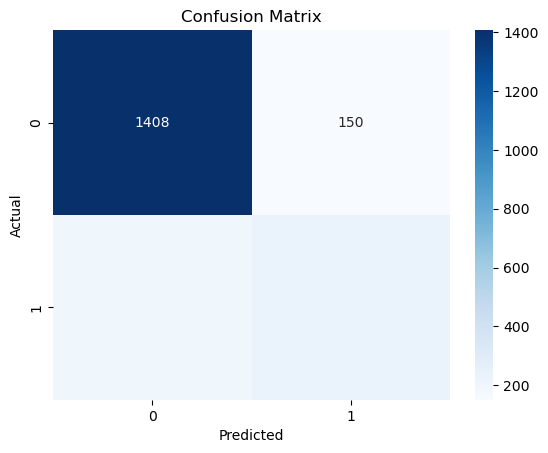

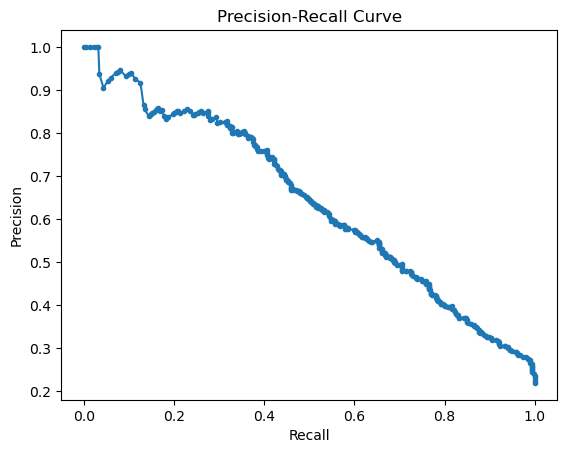

XGBoost Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1558
           1       0.68      0.53      0.60       439

    accuracy                           0.84      1997
   macro avg       0.78      0.73      0.75      1997
weighted avg       0.83      0.84      0.84      1997

ROC-AUC: 0.7312131375719704
Precision-Recall AUC: 0.6671906098232264


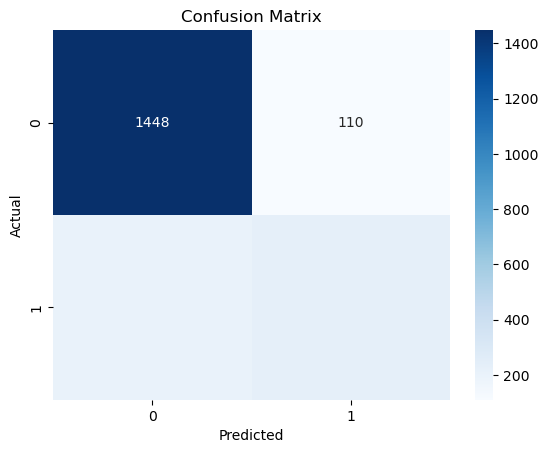

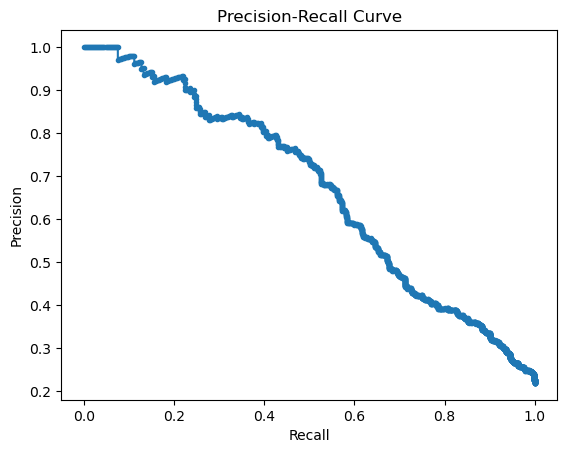

Naive Bayes Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1558
           1       0.43      0.70      0.53       439

    accuracy                           0.73      1997
   macro avg       0.66      0.72      0.67      1997
weighted avg       0.80      0.73      0.75      1997

ROC-AUC: 0.7205020161938821
Precision-Recall AUC: 0.5979700684061052


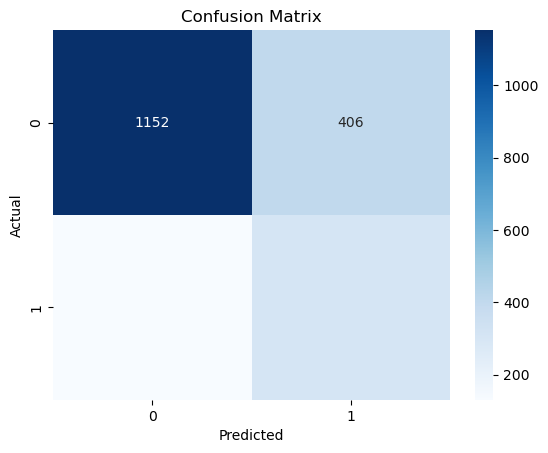

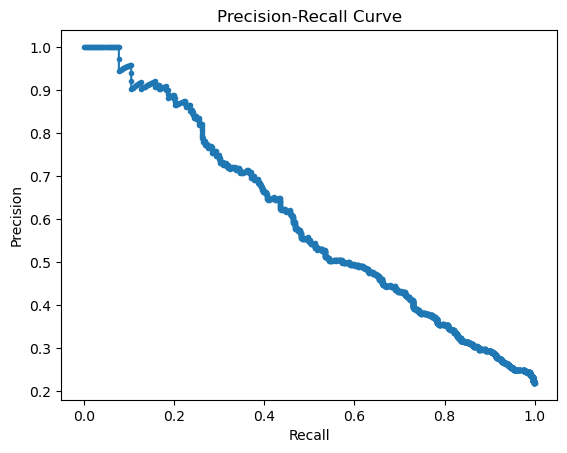

KNN Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1558
           1       0.45      0.69      0.54       439

    accuracy                           0.74      1997
   macro avg       0.67      0.72      0.68      1997
weighted avg       0.80      0.74      0.76      1997

ROC-AUC: 0.7244349832300624
Precision-Recall AUC: 0.5666919952820012


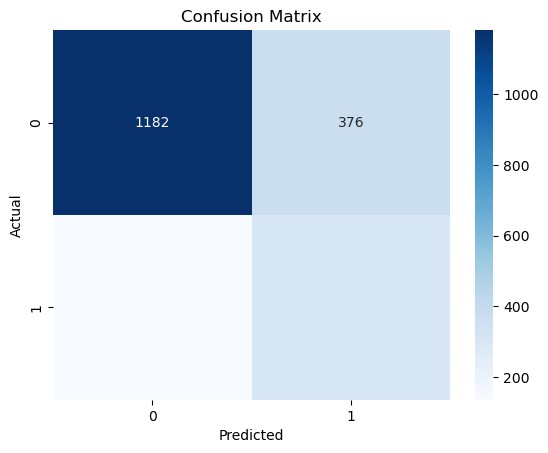

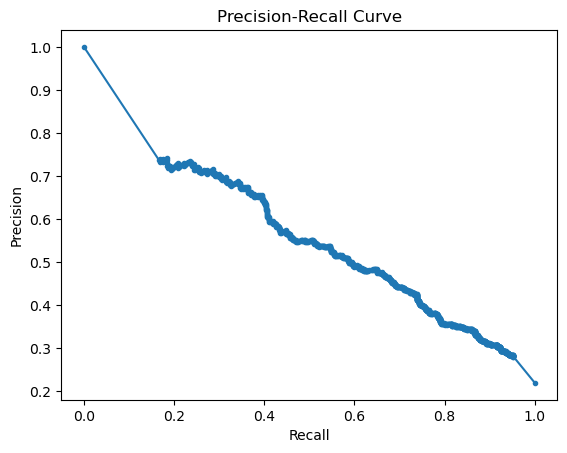

Decision Tree Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1558
           1       0.48      0.69      0.57       439

    accuracy                           0.77      1997
   macro avg       0.69      0.74      0.70      1997
weighted avg       0.81      0.77      0.78      1997

ROC-AUC: 0.7388451405195026
Precision-Recall AUC: 0.5902466137070669


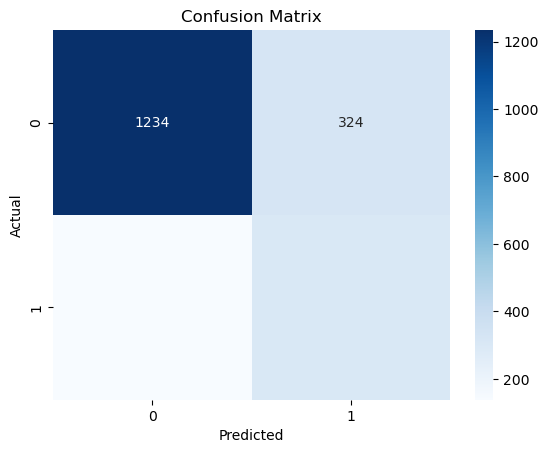

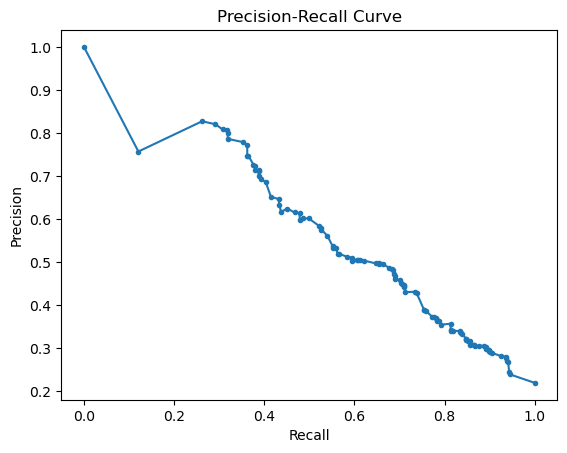

LightGBM Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1558
           1       0.67      0.51      0.58       439

    accuracy                           0.84      1997
   macro avg       0.77      0.72      0.74      1997
weighted avg       0.83      0.84      0.83      1997

ROC-AUC: 0.7185084843894838
Precision-Recall AUC: 0.669353513837647


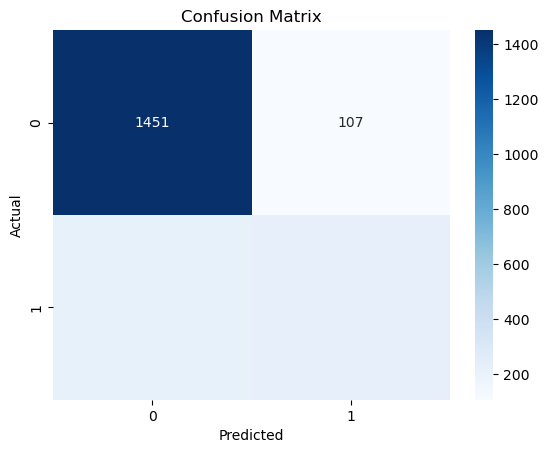

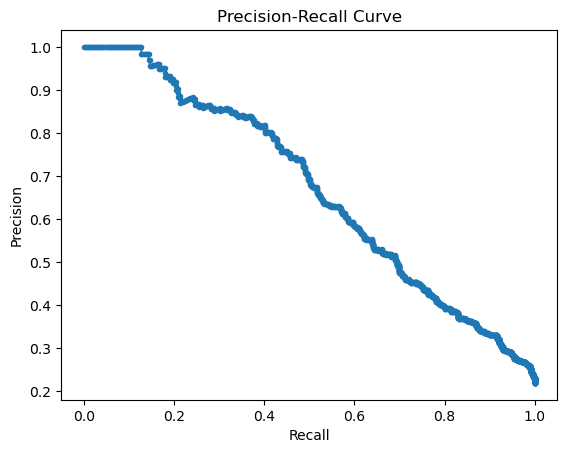

(array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([1.70177950e-01, 3.50368805e-01, 9.88807989e-01, ...,
        2.19702053e-01, 4.55497414e-05, 2.67258715e-03]))

In [34]:
print("Random Forest Evaluation:")
evaluate_model(best_rf, X_test, y_test)

print("XGBoost Evaluation:")
evaluate_model(best_xgb, X_test, y_test)

print("Naive Bayes Evaluation:")
evaluate_model(best_nb, X_test, y_test)

print("KNN Evaluation:")
evaluate_model(best_knn, X_test, y_test)

print("Decision Tree Evaluation:")
evaluate_model(best_dt, X_test, y_test)

print("LightGBM Evaluation:")
evaluate_model(best_lgb, X_test, y_test)

#### Model Fine-tuning

Fine-tuning the XGBoost model.

Fitting 5 folds for each of 10800 candidates, totalling 54000 fits
Best Hyperparameters found by GridSearchCV:
{'colsample_bytree': 0.9, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.8}
XGBoost Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1558
           1       0.69      0.53      0.60       439

    accuracy                           0.84      1997
   macro avg       0.78      0.73      0.75      1997
weighted avg       0.83      0.84      0.83      1997

ROC-AUC: 0.7290799781274399
Precision-Recall AUC: 0.6775011559411602


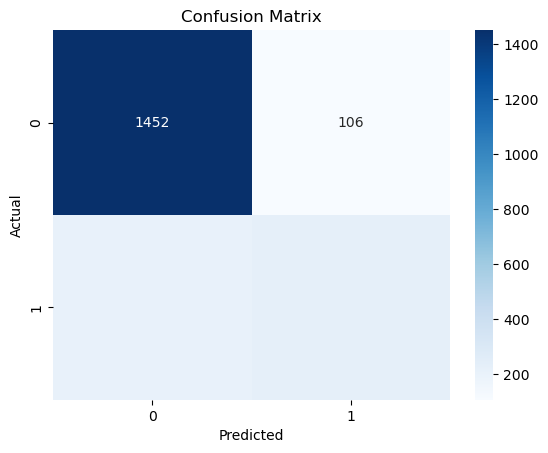

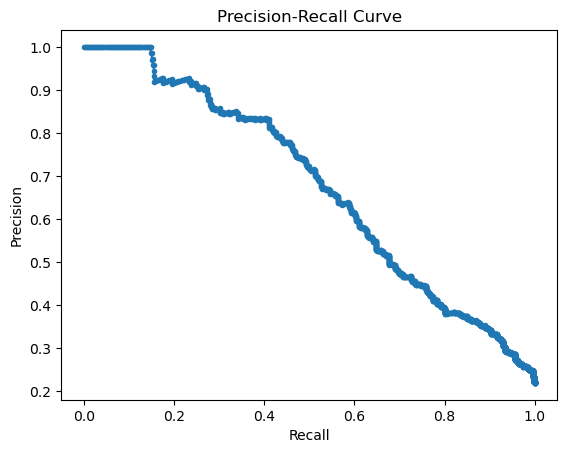

(array([0, 1, 1, ..., 0, 0, 0]),
 array([0.1246726 , 0.50719446, 0.96702254, ..., 0.357588  , 0.0015661 ,
        0.07312887], dtype=float32))

In [35]:
# Define a comprehensive hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# XGBoost with GridSearchCV
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), 
                               param_grid=param_grid_xgb, cv=5, 
                               scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit Grid Search and find the best model
grid_search_xgb.fit(X_train_balanced, y_train_balanced)
best_xgb = grid_search_xgb.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search_xgb.best_params_)

# Predict using the best model
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate XGBoost
print("XGBoost Evaluation:")
evaluate_model(best_xgb, X_test, y_test)

#### Model Deployment

Save the XGBoost model using 'joblib'.

In [36]:
import joblib

# Save the best XGBoost model
joblib.dump(best_xgb, 'xgboost_model.pkl')

['xgboost_model.pkl']